In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt

In [28]:
# Load Train_transaction file
tr_tran = pd.read_csv("dataset/train_transaction.csv", index_col="TransactionID")

In [29]:
# Load Train_identity file
tr_iden = pd.read_csv("dataset/train_identity.csv", index_col = "TransactionID")

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [30]:
# Merge data by TransactionID
tr = pd.concat([tr_iden, tr_tran], axis=1, sort=False, join='outer')

In [21]:
tr.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# V101~ 분석

# 차원축소 (PCA) 위한 데이터 가공
    - NaN 있으면 PCA ㄴㄴ

## NaN있는 애들  분석법
- null과 not null로 만들어주기
- null이 아닌 애들만 상관관계 보기
    
## 결론
- notnull과 null 로 분리
    - V1~339에서
    - V138~278 은 169V로 하나로 축소 가능 (COR=0.13), 나머지 의미 x
    - V1~V11은 V1 로 축소 가능 (COR=0.09), 나머지 의미 x
    
- notnull인 것만 보기
    - 0.30에 가까운 상관관계도 있음. 근데 NAN있는 상태에서 이용 불가
    - nan에 평균을 넣어주면 상관관계가 떨어지긴 해도 유의미함이 유지됨 (0.3->0.2)
    - imputation => 안 쓰는게 좋을 듯 (test셋에서는 isFraud 못 찾음)
    - median으로 바꾸기
    
- 결과
    - notnull null을 0,1로 구분한 V1, V168 포함. median으로 imputation한 V1~339을 PCA로 차원축소한 3개 변수 포함. 총 5개 변수 보냄.

- 학습용 세트 보내주기
    - PCA로 줄인 거 하나 (id와 V 각각 하나씩)

- 시각화 자료 보내주기
    - PCA가 뭔지, 설명해주고 설명자료 하나 보내기
    - median으로 imputation 했을 때 가장 correlation이 잘 유지되었다.
    - 다른 imputation method를 안 쓴 건, isfraud 말고 impuation의 준거가 되는 적당한 column이 없다고 판단 했기 때문임. 알다시피 isfraud 열은 test set에서는 사용불가

In [7]:
# computes the cofficient of a given column. null = 0 notnull = 1

is_f = tr['isFraud']

for i in range(1,340):
    v = 'V' + str(i)
    c1 = tr[v]
    c1[c1.notnull()]=1
    c1 = c1.fillna(0)
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

C:\Users\HeeYoung Jung\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


V1 -0.0883158716433289
V2 -0.0883158716433289
V3 -0.0883158716433289
V4 -0.0883158716433289
V5 -0.0883158716433289
V6 -0.0883158716433289
V7 -0.0883158716433289
V8 -0.0883158716433289
V9 -0.0883158716433289
V10 -0.0883158716433289
V11 -0.0883158716433289
V167 0.13345519635108416
V168 0.13345519635108416
V169 0.13392268026176526
V170 0.13392268026176526
V171 0.13392268026176526
V172 0.13345519635108416
V173 0.13345519635108416
V174 0.13392268026176526
V175 0.13392268026176526
V176 0.13345519635108416
V177 0.13345519635108416
V178 0.13345519635108416
V179 0.13345519635108416
V180 0.13392268026176526
V181 0.13345519635108416
V182 0.13345519635108416
V183 0.13345519635108416
V184 0.13392268026176526
V185 0.13392268026176526
V186 0.13345519635108416
V187 0.13345519635108416
V188 0.13392268026176526
V189 0.13392268026176526
V190 0.13345519635108416
V191 0.13345519635108416
V192 0.13345519635108416
V193 0.13345519635108416
V194 0.13392268026176526
V195 0.13392268026176526
V196 0.1334551963510

In [ ]:
# computes the cofficient of a given column. compute only notnull.

is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1[tr[v].notnull()]
    is_f_new = is_f[tr[v].notnull()]
    value = np.corrcoef(is_f_new, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

In [10]:
# computes the cofficient of a given column. null = mean

is_f = tr['isFraud']

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.mean())
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

In [11]:
is_f = tr['isFraud']

for i in range(1,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.median())
    value = np.corrcoef(is_f, c1)[0,1]
    if abs(value) > 0.05:
        print('V' + str(i), value)

In [12]:
# computes the cofficient of a given column. ori VS mean VS median

is_f = tr['isFraud']
X, y_ori, y_mean, y_median = [], [], [], []

for i in range(101,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c2 = c1[tr[v].notnull()].copy()
    
    # null = 0 notnull = 1
    is_f_new = is_f[tr[v].notnull()]
    value = np.corrcoef(is_f_new, c2)[0,1]
    X.append('V' + str(i))
    y_ori.append(value)
    
    # null = mean
    c3 = c1.fillna(c1.mean()).copy()
    value = np.corrcoef(is_f, c3)[0,1]
    y_mean.append(value)
    
    #null =median
    c4 = c1.fillna(c1.median()).copy()
    value = np.corrcoef(is_f, c4)[0,1]
    y_median.append(value)

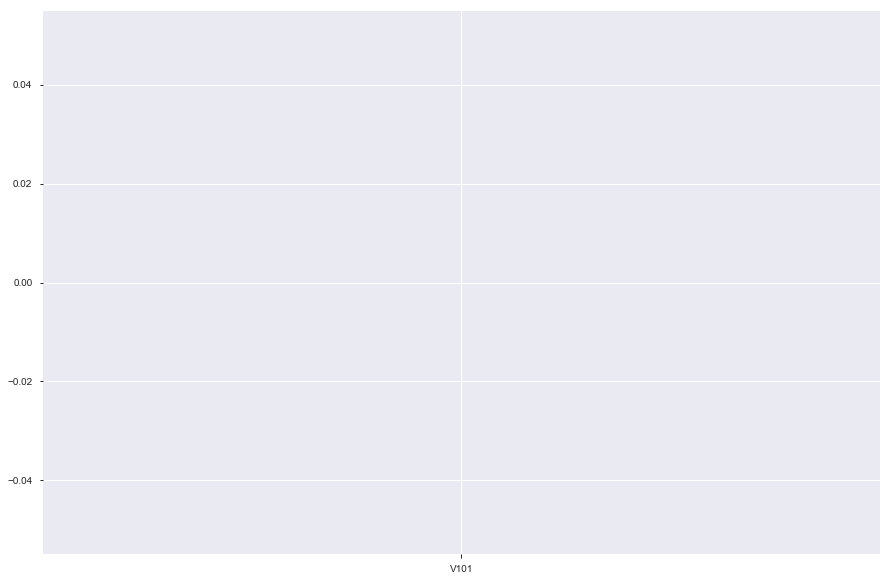

In [13]:
#plotting t, a separately
plt.figure(figsize=((15,10)))
plt.plot(X, y_mean, 'r')
plt.plot(X, y_median, 'black')
plt.show()

# PCA 적용
- 일단 먼저 nan을 median으로 대체해줌

In [22]:
tr_new = pd.DataFrame()

for i in range(1,340):
    v = 'V' + str(i)
    c1 = tr[v].copy()
    c1 = c1.fillna(c1.median())
    tr_new = pd.concat([tr_new, c1], axis=1, sort=False, join='outer')

In [25]:
tr_new.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
2987000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2987001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,

In [26]:
tr_new = StandardScaler().fit_transform(tr_new)

In [15]:
tr_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
pca = PCA(n_components=0.95) 
X2D = pca.fit_transform(tr_new)

C:\Users\HeeYoung Jung\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [20]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([nan])

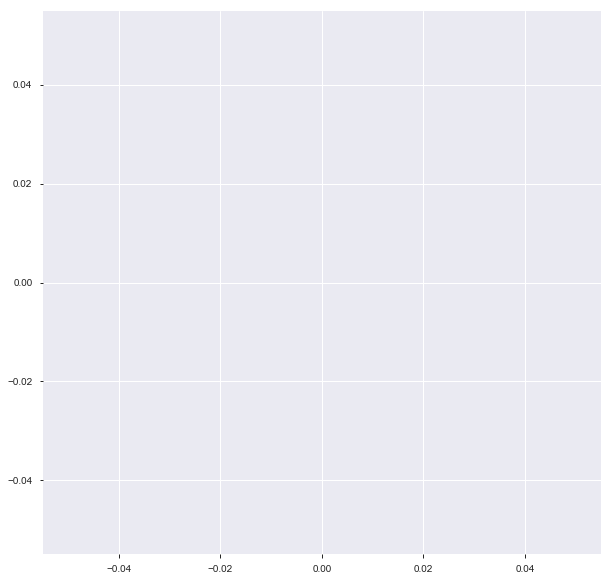

In [14]:
plt.figure(figsize=((10,10)))
plt.plot(cumsum)

In [21]:
V1_339 = X2D
V1_339 = pd.DataFrame(V1_339)

In [22]:
# extract and turn column V169 into list and then to pd.df to merge with V1_339

V169 = tr['V169'].copy()
V169[V169.notnull()]=1
V169 = list(V169.fillna(0))
V169 = pd.DataFrame(c1)

V1 = tr['V1'].copy()
V1[V1.notnull()]=1
V1 = list(V1.fillna(0))
V1 = pd.DataFrame(c1)

In [23]:
# Merge data by TransactionID
V1_339 = pd.DataFrame.append(V1_339, V1)
V1_339 = pd.DataFrame.append(V1_339, V169)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [24]:
V1_339.to_csv(r'V1_V339.csv')

In [ ]:
tr_tran = pd.read_csv("dataset/train_transaction.csv", index_col="TransactionID")